## Instruções
### Descubra as melhores notas de matemática do ENEM 2016
Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.

### Tópicos
Neste desafio você aprenderá:

- Lógica
- Análise de dados
- Estatística
- Regression

### Detalhes
O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.
### TAREFA 1
Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:

- matemática: 3
- ciências da natureza: 2
- linguagens e códigos: 1.5
- ciências humanas: 1
- redação: 3

### TAREFA 2

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna <b>NU_NOTA_MT</b>) de quem participou do ENEM 2016.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: <b>NU_INSCRICAO</b> e <b>NU_NOTA_MT</b>.

Faça o upload do arquivo answer.csv usando o botão “Submeter resposta”.

### Observações
O objetivo do desafio é avaliar a sua capacidade de resolver problemas, então ele pode ser resolvido em qualquer linguagem de programação ou ferramenta que você tenha facilidade. Mas recomendamos o uso de linguagens com maior ferramental de matemática e estatística como Python, R, Scala ou Julia.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston # para carregar os dados
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # importa o modelo
import numpy as np
import warnings
import statsmodels.api as st
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train.shape

(13730, 167)

In [5]:
df_train.columns.to_frame()

,0
Unnamed: 0,Unnamed: 0
NU_INSCRICAO,NU_INSCRICAO
NU_ANO,NU_ANO
CO_MUNICIPIO_RESIDENCIA,CO_MUNICIPIO_RESIDENCIA
NO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA
NU_IDADE,NU_IDADE
TP_SEXO,TP_SEXO
TP_ESTADO_CIVIL,TP_ESTADO_CIVIL


# TAREFA 1
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Determino os 20 melhores colocados por ordem para os pesos abaixo : </h1>
<p>Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:</p>
<ul>
    <li>Matemática , peso 3, coluna NU_NOTA_MT</li>
    <li>Ciências da Natureza, peso 2</li>
    <li>Linguagens e Código, peso 3</li>    
    <li>Ciências Humanas, peso 1</li>        
    <li>Redação, peso 3</li>            
</ul>
<p>O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016. </p>
</div>


In [6]:
# Trabalhando com dados NaN, incluindo o valor 0
df_train['NU_NOTA_LC'] = df_train[df_train['TP_PRESENCA_LC'] < 0 ][['NU_NOTA_LC']].replace(to_replace = np.nan,value=0)
df_train['NU_NOTA_MT'] = df_train[df_train['TP_PRESENCA_LC'] < 0 ][['NU_NOTA_MT']].replace(to_replace = np.nan,value=0)
df_train['NU_NOTA_CN'] = df_train[df_train['TP_PRESENCA_LC'] < 0 ][['NU_NOTA_CN']].replace(to_replace = np.nan,value=0)
df_train['NU_NOTA_CH'] = df_train[df_train['TP_PRESENCA_LC'] < 0 ][['NU_NOTA_CH']].replace(to_replace = np.nan,value=0)
df_train['NU_NOTA_REDACAO'] = df_train[df_train['TP_PRESENCA_LC'] < 0 ][['NU_NOTA_REDACAO']].replace(to_replace = np.nan,value=0)


In [7]:
# Verificando a existencia de valores Nulos ( NaN )
df_train['NU_NOTA_LC'].isnull().sum()


13730

In [14]:
nota_mt = df_train[df_train['TP_PRESENCA_LC'] > 0 ][['NU_NOTA_MT']] * 3

In [15]:
nota_cn = df_train[df_train['TP_PRESENCA_LC'] > 0 ][['NU_NOTA_CN']] * 2

In [16]:
nota_lc = df_train[df_train['TP_PRESENCA_LC'] > 0 ][['NU_NOTA_LC']] * 3

In [17]:
nota_ch = df_train[df_train['TP_PRESENCA_LC'] > 0 ][['NU_NOTA_CH']] * 1.5

In [18]:
nota_redacao = df_train[df_train['TP_PRESENCA_LC'] > 0 ][['NU_NOTA_REDACAO']] * 3

In [ ]:
print('{} + {} + {} + {} + {}'.format(nota_mt,nota_))

In [12]:
# Matemática , peso 3, Coluna NU_NOTA_MT
# df_treino['NU_NOTA_MT'].mean() * 3
# Calculando a Média ponderada : é a soma de todos os elementos da amostra multiplicando cada elemento pelo
# peso e dividindo o resultado pela soma dos elementos da amostra
df_train['NU_NOTA_UNIVERSIDADE'] = (nota_mt + nota_cn + nota_lc + nota_ch + nota_redacao)/(3+2+3+1.5+3)

ValueError: Wrong number of items passed 5, placement implies 1

In [10]:
# Qual é a renda mensal de sua família? 
# (Some a sua renda com a dos seus familiares.)
# Q006
# A	Nenhuma renda.
# B	Até R$ 880,00.
# C	De R$ 880,01 até R$ 1.320,00.
# D	De R$ 1.320,01 até R$ 1.760,00.
# E	De R$ 1.760,01 até R$ 2.200,00.
# F	De R$ 2.200,01 até R$ 2.640,00.
# G	De R$ 2.640,01 até R$ 3.520,00.
# H	De R$ 3.520,01 até R$ 4.400,00.
# I	De R$ 4.400,01 até R$ 5.280,00.
# J	De R$ 5.280,01 até R$ 6.160,00.
# K	De R$ 6.160,01 até R$ 7.040,00.
# L	De R$ 7.040,01 até R$ 7.920,00.
# M	De R$ 7.920,01 até R$ 8.800,00.
# N	De R$ 8.800,01 até R$ 10.560,00.
# O	De R$ 10.560,01 até R$ 13.200,00.
# P	De R$ 13.200,01 até R$ 17.600,00.
# Q	Mais de R$ 17.600,00.
df_train.sort_values(by=['NU_NOTA_UNIVERSIDADE'], ascending=False)[['NU_INSCRICAO',
          'TP_ESCOLA',
          'Q006',
          'SG_UF_RESIDENCIA',
          'IN_TREINEIRO',
          'NU_NOTA_MT',
          'NU_NOTA_LC',
          'NU_NOTA_CH',
          'NU_NOTA_REDACAO',
          'NU_NOTA_UNIVERSIDADE']].head(20)

KeyError: 'NU_NOTA_UNIVERSIDADE'

# Correlação
![Image](https://miro.medium.com/max/436/1*KWAowigAR0EqWMmSBwOsqg.png)
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Correlação de Pearson</h1>
<p>Quanto maior for o valor de uma variavel, maior será o da outra (correlação positiva ), exite uma correlação linear</p> 
<ul>
    <li>0.9 para mais ou para menos indica uma correlação muito forte.</li>
    <li>0.7 a 0.9 positivo ou negativo indica uma correlação forte.</li>
    <li>0.5 a 0.7 positivo ou negativo indica uma correlação moderada.</li>
    <li>0.3 a 0.5 positivo ou negativo indica uma correlação fraca.</li>
    <li>0 a 0.3 positivo ou negativo indica uma correlação desprezível.</li>
</ul>
<p> Quando  o coeficiente de correlação se aproxima de 1, 
 nota-se um aumento no valor de uma variável quando a outra também aumenta, 
 ou seja, há uma relação linear positiva. Quando o coeficiente se aproxima de -1,
 também é possível dizer que as variáveis são correlacionadas, mas nesse caso quando o valor de uma variável aumenta o da outra diminui. Isso é o que é 
    chamado de correlação negativa ou inversa.</p>
</div>

In [11]:
df_train[['NU_NOTA_LC',
          'NU_NOTA_MT',
          'NU_NOTA_CH',
          'NU_NOTA_REDACAO',
          'NU_NOTA_UNIVERSIDADE']].corr(method='pearson')

KeyError: "['NU_NOTA_UNIVERSIDADE'] not in index"

In [12]:
# Resposta da Terafa 01 ( os 20 Maiores notas)
df_train.sort_values(by=['NU_NOTA_UNIVERSIDADE'], ascending=False)[['NU_INSCRICAO',
          'NU_NOTA_MT',
          'NU_NOTA_LC',
          'NU_NOTA_CH',
          'NU_NOTA_REDACAO',
          'NU_NOTA_UNIVERSIDADE']].head(20)

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_REDACAO,NU_NOTA_UNIVERSIDADE
3226,97166da67df0908861a868cf318b277c4bdbb0da,868.2,718.5,782.1,920.0,813.204
10801,848daf808904864c1ee5d51545a2539e2dcbe901,916.6,646.7,670.3,960.0,805.100
3682,b733ccac4e5b7c1da0448f1dad7990ec0793b1d2,935.1,707.6,689.0,840.0,800.864
9011,78ca18b6fea7ccd3e067b3945cf200f8686209a7,784.5,678.8,725.7,980.0,797.044
4755,8588b01c2ff81ad3c9ff31cd89fc094896c4aa69,817.1,672.1,748.7,940.0,794.084
12707,19982f867b8f23a829a2f738374770708ec7f263,826.1,677.3,673.1,940.0,788.548
6039,17ae668ce9041105883e9db101d614f58d526f66,811.0,662.0,726.5,940.0,787.932
3535,32767c1a152919a1f72fa91afe19bb7c559f2824,838.8,693.4,767.2,880.0,786.528
1509,41489fd85a5d0cb6e397fb5ebcd19d32e9265cb7,819.8,665.3,807.0,920.0,786.496
10219,3326c76719930f9838bc9ef803fe1b73a1668723,836.9,669.8,712.6,940.0,784.496


# TAREFA 2
<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Crie um modelo para prever nota da prova de matemática (coluna <b>NU_NOTA_MT</b>) de quem participou do ENEM 2016</h1>
<p>O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016. </p>
    
<p>No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna <b>NU_NOTA_MT</b>) de quem participou do ENEM 2016.</p>

<p>Salve sua resposta em um arquivo chamado answer.csv com duas colunas: <b>NU_INSCRICAO</b> e <b>NU_NOTA_MT</b>.</p>

<p>Faça o upload do arquivo answer.csv usando o botão “Submeter resposta”.</p>

### Observações
<p>O objetivo do desafio é avaliar a sua capacidade de resolver problemas, então ele pode ser resolvido em qualquer linguagem de programação ou ferramenta que você tenha facilidade. Mas recomendamos o uso de linguagens com maior ferramental de matemática e estatística como Python, R, Scala ou Julia.</p>    
</div>

In [13]:
df_test = pd.read_csv('test.csv')

In [14]:
df_test.columns.to_frame()

,0
NU_INSCRICAO,NU_INSCRICAO
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA
NU_IDADE,NU_IDADE
TP_SEXO,TP_SEXO
TP_COR_RACA,TP_COR_RACA
TP_NACIONALIDADE,TP_NACIONALIDADE
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU
TP_ESCOLA,TP_ESCOLA


In [15]:
df_test.shape

(4576, 47)

In [16]:
df_test['NU_NOTA_MT'] = 0

In [17]:
df_test.shape

(4576, 48)

In [18]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047', 'NU_NOTA_MT'],
      dtype='object')

In [19]:
# Verifiando valores nulos Nan
df_test.isnull().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 3096
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    3096
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                1134
NU_NOTA_CH                1134
NU_NOTA_LC                1199
TP_LINGUA                    0
TP_STATU

In [20]:
df_test[df_test['CO_PROVA_MT'] == '81d0ee00ef42a7c23eb04496458c03d4c5b9c31a'][['NU_NOTA_MT',
                                                                               'NU_NOTA_LC',
                                                                               'NU_NOTA_CH',
                                                                               'NU_NOTA_CN',
                                                                               'SG_UF_RESIDENCIA']].count

<bound method DataFrame.count of       NU_NOTA_MT  NU_NOTA_LC  NU_NOTA_CH  NU_NOTA_CN SG_UF_RESIDENCIA
0              0       431.8       443.5       464.8               PR
7              0       451.8       521.0       423.2               CE
9              0       488.7       518.5       456.8               PA
13             0       525.5       606.7       597.2               PB
15             0       613.8       537.5       410.4               RJ
20             0       477.8       546.3       390.3               SP
28             0       468.6       493.5       459.9               GO
32             0       535.5       538.2       610.1               DF
36             0       510.6       508.8       443.0               RJ
40             0       520.3       563.5       477.2               RS
42             0       532.1       552.0       520.6               CE
46             0       526.8       533.9       524.9               MG
65             0       512.5       489.6       436.0     

In [21]:
df_test[df_test['TP_PRESENCA_LC'] > 0 ][['NU_NOTA_LC','TP_PRESENCA_LC']].isnull().sum()

NU_NOTA_LC        4
TP_PRESENCA_LC    0
dtype: int64

In [22]:
df_test[df_test['NU_NOTA_LC'].isnull() == True][['TP_PRESENCA_LC','NU_NOTA_LC']]

,TP_PRESENCA_LC,NU_NOTA_LC
3,0,NaN
10,0,NaN
11,0,NaN
16,0,NaN
17,0,NaN
18,0,NaN
21,0,NaN
22,0,NaN
29,0,NaN
30,0,NaN


In [23]:
df_test['NU_NOTA_LC'] = df_test['NU_NOTA_LC'].replace(to_replace = np.nan,value=0)

In [24]:
# Criando um campo para colocar a presença dos participantes, se for maior que zero entra na TAREFA 2
df_test['PRESENCA'] = df_test['TP_PRESENCA_CN']+df_test['TP_PRESENCA_LC']+df_test['TP_PRESENCA_CH']

In [25]:
df_test[['NU_INSCRICAO',
         'PRESENCA',
         'TP_PRESENCA_CN',
         'TP_PRESENCA_CH',
         'TP_PRESENCA_LC']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 5 columns):
NU_INSCRICAO      4576 non-null object
PRESENCA          4576 non-null int64
TP_PRESENCA_CN    4576 non-null int64
TP_PRESENCA_CH    4576 non-null int64
TP_PRESENCA_LC    4576 non-null int64
dtypes: int64(4), object(1)
memory usage: 178.8+ KB


In [26]:
df_test[['NU_INSCRICAO',
         'PRESENCA',
         'TP_PRESENCA_CN',
         'TP_PRESENCA_CH',
         'TP_PRESENCA_LC']].describe()

,PRESENCA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC
count,4576.000000,4576.000000,4576.000000,4576.000000
mean,2.244100,0.752185,0.752185,0.739729
std,1.287887,0.431791,0.431791,0.440818
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000
50%,3.000000,1.000000,1.000000,1.000000
75%,3.000000,1.000000,1.000000,1.000000
max,4.000000,1.000000,1.000000,2.000000


In [27]:
# presença nas provas 
# - TP_PRESENCA_CN
# - TP_PRESENCA_LC
# - TP_PRESENCA_CH
# - TP_STATUS_REDACAO
df_test[['TP_COR_RACA',
         'TP_PRESENCA_CN',
         'TP_PRESENCA_LC',
         'TP_PRESENCA_CH',
         'TP_STATUS_REDACAO',
         'PRESENCA']].head(10)


,TP_COR_RACA,TP_PRESENCA_CN,TP_PRESENCA_LC,TP_PRESENCA_CH,TP_STATUS_REDACAO,PRESENCA
0,3,1,1,1,1.0,3
1,3,1,1,1,1.0,3
2,1,1,1,1,1.0,3
3,3,0,0,0,NaN,0
4,1,1,1,1,1.0,3
5,3,1,1,1,1.0,3
6,1,1,1,1,1.0,3
7,3,1,1,1,1.0,3
8,3,1,1,1,1.0,3
9,3,1,1,1,1.0,3


In [28]:
df_test[['TP_COR_RACA',
         'TP_PRESENCA_CN',
         'TP_PRESENCA_LC',
         'TP_PRESENCA_CH',
         'TP_STATUS_REDACAO',
         'PRESENCA']].describe()

,TP_COR_RACA,TP_PRESENCA_CN,TP_PRESENCA_LC,TP_PRESENCA_CH,TP_STATUS_REDACAO,PRESENCA
count,4576.000000,4576.000000,4576.000000,4576.000000,3377.000000,4576.000000
mean,2.181163,0.752185,0.739729,0.752185,1.095943,2.244100
std,1.017531,0.431791,0.440818,0.431791,0.695047,1.287887
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
50%,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000
75%,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000
max,5.000000,1.000000,2.000000,1.000000,9.000000,4.000000


In [29]:
df_test['NU_NOTA_LC'] = df_test['NU_NOTA_LC'].replace(to_replace = np.nan,value=0)
df_test['NU_NOTA_MT'] = df_test['NU_NOTA_MT'].replace(to_replace = np.nan,value=0)
df_test['NU_NOTA_CN'] = df_test['NU_NOTA_CN'].replace(to_replace = np.nan,value=0)
df_test['NU_NOTA_CH'] = df_test['NU_NOTA_CH'].replace(to_replace = np.nan,value=0)
df_test['NU_NOTA_REDACAO'] = df_test['NU_NOTA_REDACAO'].replace(to_replace = np.nan,value=0)

### A REGREÇÃO LINEAR está ancorada em alguns pressupostos que precisam ser respeitados. Caso contrário, seus resultados tendem a ficar enviesados. São eles:
<ul>
    <li>1 - A relação entre a variável resposta e os preditores é linear. </li>
    <li>2 - A variável resposta possui distribuição normal. Os testes estatísticos desse método são todos baseados no pressuposto da normalidade. Caso tentemos analisar uma variável que não possui distribuição normal com esse método, os resultados não serão bons.</li>
    <li>3 - O termo do erro é não correlacionado com a variável resposta.</li>
    <li>4 - O termo do erro possui distribuição normal com média 0.</li>
    <li>5 - O termo do erro é homoscedástico, ou seja, possui variância constante em toda a sua extensão.</li>
    <li>6 - Os parâmetros populacionais são constantes, ou seja, valores fixos desconhecidos os quais serão estimados pela equação de regressão.</li>
</ul>

In [30]:
# Correlação linear entre as variaveis
df_train[['NU_NOTA_LC',
          'NU_NOTA_CH',
          'TP_PRESENCA_LC',
          'NU_NOTA_CN',
          'NU_NOTA_REDACAO']].corr(method='pearson')

,NU_NOTA_LC,NU_NOTA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
NU_NOTA_LC,1.000000,0.934704,0.964224,0.920917,0.904795
NU_NOTA_CH,0.934704,1.000000,0.917000,0.969323,0.871199
TP_PRESENCA_LC,0.964224,0.917000,1.000000,0.910132,0.865595
NU_NOTA_CN,0.920917,0.969323,0.910132,1.000000,0.857810
NU_NOTA_REDACAO,0.904795,0.871199,0.865595,0.857810,1.000000


In [31]:
# Correlação linear entre as variaveis
df_train[['NU_NOTA_LC',
          'NU_NOTA_CH',
          'NU_NOTA_MT',
          'TP_PRESENCA_CN',
          'NU_NOTA_CN',
          'NU_NOTA_REDACAO']].corr()

,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_MT,TP_PRESENCA_CN,NU_NOTA_CN,NU_NOTA_REDACAO
NU_NOTA_LC,1.000000,0.934704,0.943954,0.913254,0.920917,0.904795
NU_NOTA_CH,0.934704,1.000000,0.903608,0.956152,0.969323,0.871199
NU_NOTA_MT,0.943954,0.903608,1.000000,0.874764,0.907039,0.875929
TP_PRESENCA_CN,0.913254,0.956152,0.874764,1.000000,0.950512,0.821287
NU_NOTA_CN,0.920917,0.969323,0.907039,0.950512,1.000000,0.857810
NU_NOTA_REDACAO,0.904795,0.871199,0.875929,0.821287,0.857810,1.000000


In [32]:
df_test['NU_NOTA_MT'].describe()

count    4576.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: NU_NOTA_MT, dtype: float64

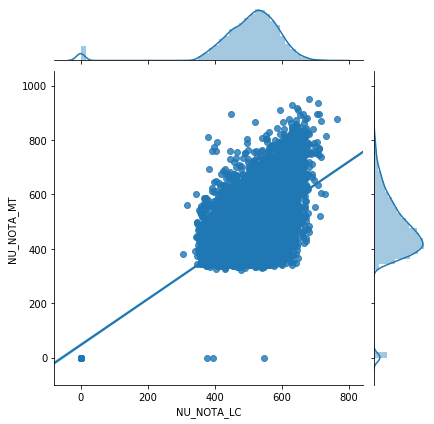

In [33]:
sns.jointplot(x='NU_NOTA_LC',y='NU_NOTA_MT',data=df_train[df_train['TP_PRESENCA_CN'] > 0][['NU_NOTA_MT','NU_NOTA_LC']], kind='reg')


In [34]:
correlacao = df_train[df_train['TP_PRESENCA_CN'] > 0 ].corr()
correlacao.sort_values(["NU_NOTA_MT"], ascending = False, inplace = True)
correlacao.NU_NOTA_MT.to_frame()

,NU_NOTA_MT
NU_NOTA_MT,1.000000
NU_NOTA_UNIVERSIDADE,0.837174
NU_NOTA_LC,0.712686
TP_PRESENCA_LC,0.575419
TP_PRESENCA_MT,0.575419
NU_NOTA_REDACAO,0.549723
NU_NOTA_CN,0.490386
NU_NOTA_CH,0.459012
NU_NOTA_COMP3,0.350013
NU_NOTA_COMP5,0.342969


### ESTAS DUAS VARIAVEIS EXPLICAM MELHOR A NOTA DA PROVA DE MATEMÁTICA
### Quem foi na prova de Ciencias da Natureza TP_PRESENCA_CN == 1
#### NU_NOTA_LC                     0.712686
#### TP_PRESENCA_LC                 0.575419
<p>variável independente = features independentes, inputs, regressores ou variáveis preditoras. Usadas para prever o resultado. (x)</p>
<p>variável dependente = features dependentes, target, alvo, outputs ou responses. É a que queremos descobrir. (y)</p>
<p>resíduos = são os erros de predição, representam a diferença entre a previsão e o que realmente aconteceu.</p>

In [35]:

# VARIAVEL QUE X vai ser os dados de test
X = df_train[df_train['TP_PRESENCA_CN'] > 0 ][['NU_NOTA_LC']]


In [36]:
# Variavel que queremos responder 
y = df_train[df_train['TP_PRESENCA_CN'] > 0 ][['NU_NOTA_MT']]

In [37]:
# CRIANDO O MODELO DE REGREÇÂO LINEAR
modelo_enem = LinearRegression().fit(X,y)

In [38]:
# AVALIANDO O MODELO
print('coeficiente de determinação:', modelo_enem.score(X, y))
# Intercept
print('intercept:', modelo_enem.intercept_)
# Slope
print('slope:', modelo_enem.coef_)

coeficiente de determinação: 0.5079217257795832
intercept: [46.17826697]
slope: [[0.84258739]]


In [39]:
# SELECIONANDO APENAS OS QUE PARTICIPARAM DO ENEM ( TP_PRESENCA_CN diferente de 0 )
test_X = df_test[df_test['TP_PRESENCA_CN'] > 0 ][['NU_NOTA_LC']]

In [40]:
# Aplicando o modelo em um novo conjunto de dados, usando o arquivo test.csv
nota_matematica_y = modelo_enem.predict(test_X)
print(nota_matematica_y)

[[410.00750387]
 [507.9161591 ]
 [563.18989217]
 ...
 [443.12118847]
 [555.85938184]
 [501.34397742]]


In [41]:
# SELECIONANDO APENAS OS QUE PARTICIPARAM DO ENEM ( TP_PRESENCA_CN diferente de 0 )
df_resposta = df_test[df_test['TP_PRESENCA_CN'] > 0 ][['NU_INSCRICAO']]

In [42]:
df_resposta.count()

NU_INSCRICAO    3442
dtype: int64

In [43]:
len(nota_matematica_y)

3442

In [44]:
df_resposta['NU_NOTA_MT'] = nota_matematica_y

In [45]:
df_resposta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3442 entries, 0 to 4574
Data columns (total 2 columns):
NU_INSCRICAO    3442 non-null object
NU_NOTA_MT      3442 non-null float64
dtypes: float64(1), object(1)
memory usage: 80.7+ KB


In [46]:
df_resposta.head(10)

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,410.007504
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,507.916159
2,b38a03232f43b11c9d0788abaf060f7366053b6d,563.189892
4,715494628a50142ce8cb17191cfe6d0f3cae0934,527.632704
5,e656d6bad65c93fb2880f1eba5037008c8e75774,503.281928
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,557.291780
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,426.859252
8,043c544a2104aa8a9849f1a703a08d37a2f16839,508.421712
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,457.950727
12,940aede382ccb332fab15d413217695ec44ca765,496.372712


In [47]:
df_resposta.to_csv('answer1.csv')

In [48]:
answer = pd.read_csv('answer1.csv')

In [49]:
answer.head()

,Unnamed: 0,NU_INSCRICAO,NU_NOTA_MT
0,0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,410.007504
1,1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,507.916159
2,2,b38a03232f43b11c9d0788abaf060f7366053b6d,563.189892
3,4,715494628a50142ce8cb17191cfe6d0f3cae0934,527.632704
4,5,e656d6bad65c93fb2880f1eba5037008c8e75774,503.281928


In [50]:
answer.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_NOTA_MT'], dtype='object')

In [51]:
answer.drop(columns='Unnamed: 0',inplace=True)

In [52]:
# Salvando o arquivo para o desafio, não pode conter o indice.
answer.to_csv('answer.csv',columns=['NU_INSCRICAO', 'NU_NOTA_MT'],index=False)